In [1]:
# 선형계층 : Linear layer

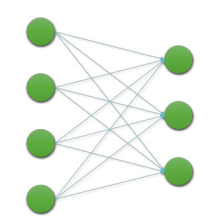

In [2]:
# f:R4 -> R3
# 함수는 가중치 파라메터 -> 함수의 동작이  설명

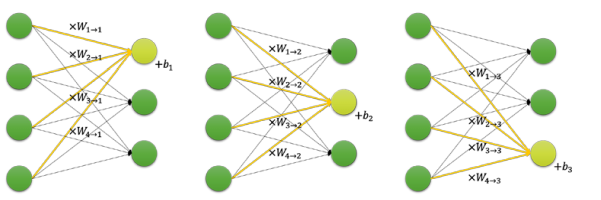

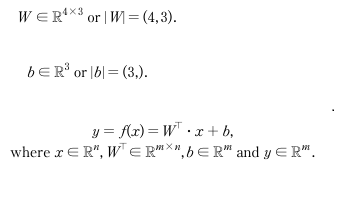

In [3]:
# 선형계층은 행렬 곱셈과 벡터의 덧셈으로 이루어져 있기 때문에 선형 변환

In [4]:
# 직접 구현하기  3 x 2
import torch
W = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
  ])
b = torch.FloatTensor([2,2])

In [5]:
def linear(x,w,b):
  y = torch.matmul(x,w) + b
  return y

In [6]:
x = torch.FloatTensor(4,3)

In [7]:
y = linear(x,W,b)
print(y.size())

torch.Size([4, 2])


In [8]:
# torch.nn.Module  상속
import torch.nn as nn

In [9]:
# init, forward 오버라이드
class MyLinear(nn.Module):
  def __init__(self,in_channel, out_channel):
    super(MyLinear,self).__init__()
    self.in_channel = in_channel
    self.out_channel = out_channel
    self.W = torch.FloatTensor(in_channel,out_channel)
    self.b = torch.FloatTensor(out_channel)
  def forward(self, x):
    # x (batch_size,in_channel)
    y = torch.matmul(x, self.W) + self.b  #  (batch_size,in_channel)* (in_channel,out_channel) = (batch_size,out_channel)

    return y

In [10]:
# __call__  : 객체(데이터)
# 부모의  __call__  안에서는 forward 호출하고 있음
# 계층으로 인식하고 학습 하지만.... 학습할수 있는 파라메터가 없음.
linear = MyLinear(3,2)
y = linear(x)
y

tensor([[1.2715e-34, 0.0000e+00],
        [1.2715e-34, 0.0000e+00],
        [1.2715e-34, 0.0000e+00],
        [1.2715e-34, 0.0000e+00]])

In [11]:
for p in linear.parameters():
  print(p)

In [12]:
# 학습이 가능한 파라메터를 만들어 줘야함  nn.Parameter 클래스를 활용

class MyLinear(nn.Module):
  def __init__(self,in_channel, out_channel):
    super(MyLinear,self).__init__()
    self.in_channel = in_channel
    self.out_channel = out_channel
    self.W = nn.Parameter( torch.FloatTensor(in_channel,out_channel))
    self.b = nn.Parameter(torch.FloatTensor(out_channel))
  def forward(self, x):
    # x (batch_size,in_channel)
    y = torch.matmul(x, self.W) + self.b  #  (batch_size,in_channel)* (in_channel,out_channel) = (batch_size,out_channel)

    return y

In [13]:
linear = MyLinear(3,2)
for p in linear.parameters():
  print(p)

Parameter containing:
tensor([[2.0189e-08, 4.5699e-41],
        [1.2924e-34, 0.0000e+00],
        [4.4842e-44, 0.0000e+00]], requires_grad=True)
Parameter containing:
tensor([2.0189e-08, 4.5699e-41], requires_grad=True)


In [14]:
# nn.Linear 활용
linear = nn.Linear(3,2)
y = linear(x)
for p in linear.parameters():
  print(p)

Parameter containing:
tensor([[ 0.5610,  0.5228, -0.4643],
        [-0.5253, -0.3258, -0.2061]], requires_grad=True)
Parameter containing:
tensor([-0.0845, -0.1124], requires_grad=True)


In [15]:
class MyLinear(nn.Module):
  def __init__(self,in_channel, out_channel):
    super(MyLinear,self).__init__()
    self.in_channel = in_channel
    self.out_channel = out_channel
    
    self.n1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    # x (batch_size,in_channel)
    y = self.n1(x)
    return y

In [16]:
# 평균제곱 오차

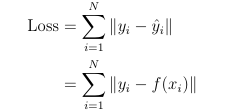

In [17]:
# L1 : L1 노름(norm)

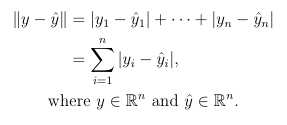

In [18]:
# L2 : L2 노름(norm)

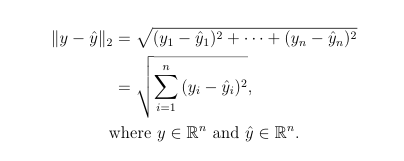

In [19]:
# RMSE : 제곱근 평균 오차

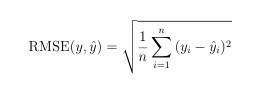

In [20]:
# MSE: 평균 제곱 오차

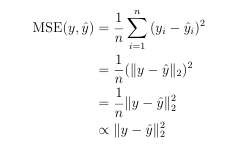

In [21]:
def mse(x_hat, x):
  y = ((x- x_hat)**2).mean()
  return y

In [22]:
x = torch.arange(4).reshape(2,2)
x_hat = torch.FloatTensor([[0,0],[0,0]])
mse(x_hat,x)

tensor(3.5000)

In [23]:
import torch.nn.functional as F
F.mse_loss(x_hat, x)

tensor(3.5000)

In [24]:
mse_loss =  nn.MSELoss()
mse_loss(x_hat, x)

tensor(3.5000)

In [25]:
# 경사하강법
# 미분
# 기울기 : x증가량에대한 y증가량
# 2차원에서 두점(x1,y1)  (x2, y2)
# y2-y1 / x2-x1

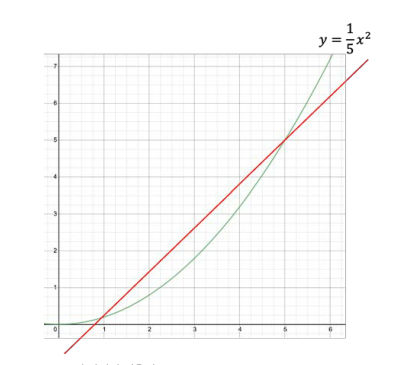

In [26]:
# x = 1,  x = 5
# x의 증가량 4  h

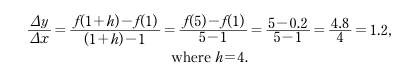

In [27]:
# y = 1.2x -1

In [28]:
# 극한(무한소)과 미분
# x의 변화량을 매우 작게
# h = x2 -x1  이라고 할때 h를 0에 가깝게 만들어 봅시다

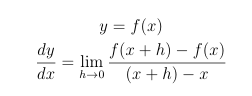

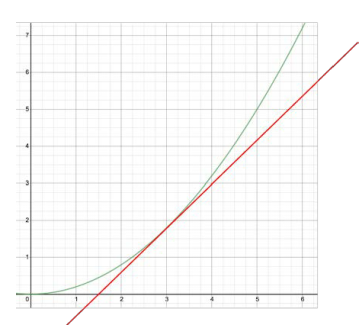

In [29]:
# 접선의 기울기 : 도함수
# 입력은 특정지점 x, 출력은 해당지점에서 함수 f의 기울기
# 함수 f의 기울기를 함수로 나타낸 g를 도함수라고 부르며 함수 f를 미분해서 얻을수 있다

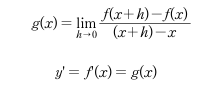

In [30]:
# 미분해서 나온 함수 도함수를 표시하는 방법
# 뉴턴 VS 라이프니츠
# 라이프니츠 표현 방식은 기울기 표시와 유사하지만. 이때 세모x가 0에 근접할때의 표현식

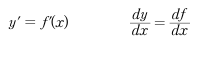

In [31]:
# 합성함수 

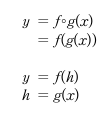

In [32]:
# 뉴턴의 미분공식

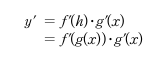

In [33]:
# f(h) = h2 이고 g(x) = x2+x


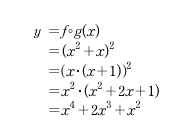

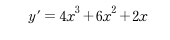

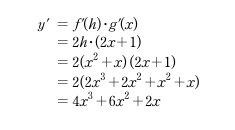

In [34]:
# 라이프니츠

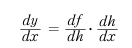

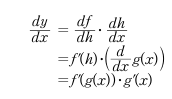

In [35]:
# 경사하강법 구현 : 함수의 출력을 최소화 하는 함수의 입력을 찾는
# 파이토치에도 자동편미분 : auto grad 기능
# 랜덤하게 생성한 텐서가 특정 텐서 값을 근사하도록 구현

In [36]:
# 목표 텐서 : target
target = torch.FloatTensor([
    [.1, .2, .3],
    [.4, .5, .6],
    [.7, .8, .9]
])

In [37]:
# 랜덤텐서... 자동미분이 되도록 속성 지정
x = torch.rand_like(target)
x.requires_grad = True
x

tensor([[0.3576, 0.4121, 0.4726],
        [0.8023, 0.5842, 0.6051],
        [0.1998, 0.0900, 0.3343]], requires_grad=True)

In [38]:
# 두 텐서 사이의 손실값... MSE
loss = F.mse_loss(x,target)
loss

tensor(0.1538, grad_fn=<MseLossBackward0>)

In [39]:
# 목표 텐서 : target
target = torch.FloatTensor([
    [.1, .2, .3],
    [.4, .5, .6],
    [.7, .8, .9]
])
x = torch.rand_like(target)
x.requires_grad = True

# while문을 사용해서 두 텐서의 값의 차이가 변수 threshold보다 작아질때까지 미분 및 경사하강법을 수행
threshold = 1e-5
lr = 1.
iter_cnt = 0
while loss > threshold:
  iter_cnt += 1
  loss = F.mse_loss(x,target)
  loss.backward()   # 편미분을 수행하고 편미분을 통해 얻어진 그래이디언트들이 x.grad에 자동으로 저장되고 이값을 이용해서 경사하강법을 수행  
  x = x -lr * x.grad
  x.detach_()  # 계산그래프에서 값을 빼준다.
  x.requires_grad_(True)

  
  print(f"{iter_cnt} : loss : {loss:.4e}")
  print(x)


1 : loss : 6.3936e-02
tensor([[0.3040, 0.2206, 0.4915],
        [0.2081, 0.8766, 0.8459],
        [0.5612, 0.7185, 0.8340]], requires_grad=True)
2 : loss : 3.8678e-02
tensor([[0.2587, 0.2160, 0.4490],
        [0.2508, 0.7929, 0.7913],
        [0.5921, 0.7366, 0.8487]], requires_grad=True)
3 : loss : 2.3397e-02
tensor([[0.2234, 0.2125, 0.4159],
        [0.2839, 0.7278, 0.7488],
        [0.6161, 0.7507, 0.8601]], requires_grad=True)
4 : loss : 1.4154e-02
tensor([[0.1960, 0.2097, 0.3901],
        [0.3097, 0.6772, 0.7157],
        [0.6347, 0.7617, 0.8690]], requires_grad=True)
5 : loss : 8.5623e-03
tensor([[0.1747, 0.2075, 0.3701],
        [0.3298, 0.6378, 0.6900],
        [0.6492, 0.7702, 0.8759]], requires_grad=True)
6 : loss : 5.1797e-03
tensor([[0.1581, 0.2059, 0.3545],
        [0.3454, 0.6072, 0.6700],
        [0.6605, 0.7768, 0.8812]], requires_grad=True)
7 : loss : 3.1334e-03
tensor([[0.1452, 0.2046, 0.3424],
        [0.3575, 0.5834, 0.6544],
        [0.6693, 0.7820, 0.8854]], requi

In [40]:
# 선형 회귀
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.datasets import load

In [41]:
col_lists = ['CRIM',     
'ZN'   ,    
'INDUS' ,   
'CHAS'   ,  
'NOX'     , 
'RM'       ,
'AGE'      ,
'DIS'      ,
'RAD'      ,
'TAX'      ,
'PTRATIO'  ,
'B'        ,
'LSTAT'    
     ]


In [42]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [43]:
train = pd.DataFrame(data,columns=col_lists)
train.head()

#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
target = pd.DataFrame(target,columns=['traget'])
df = pd.concat([train,target], axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,traget
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<Axes: >

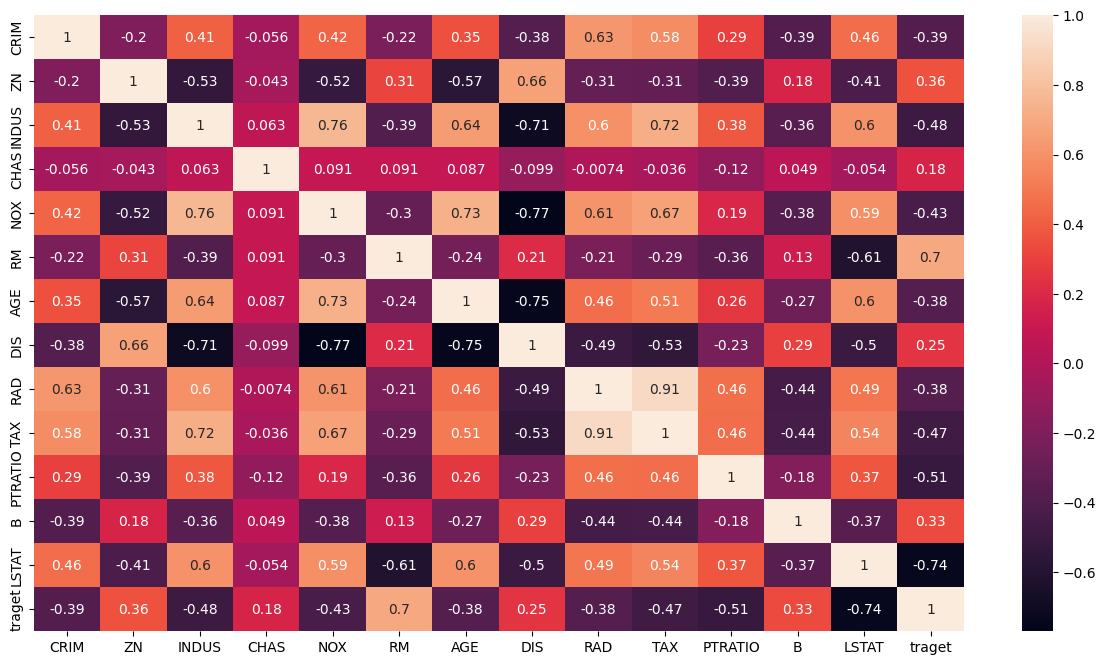

In [49]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)

In [61]:
cols = ['traget','LSTAT', 'RM', 'PTRATIO']

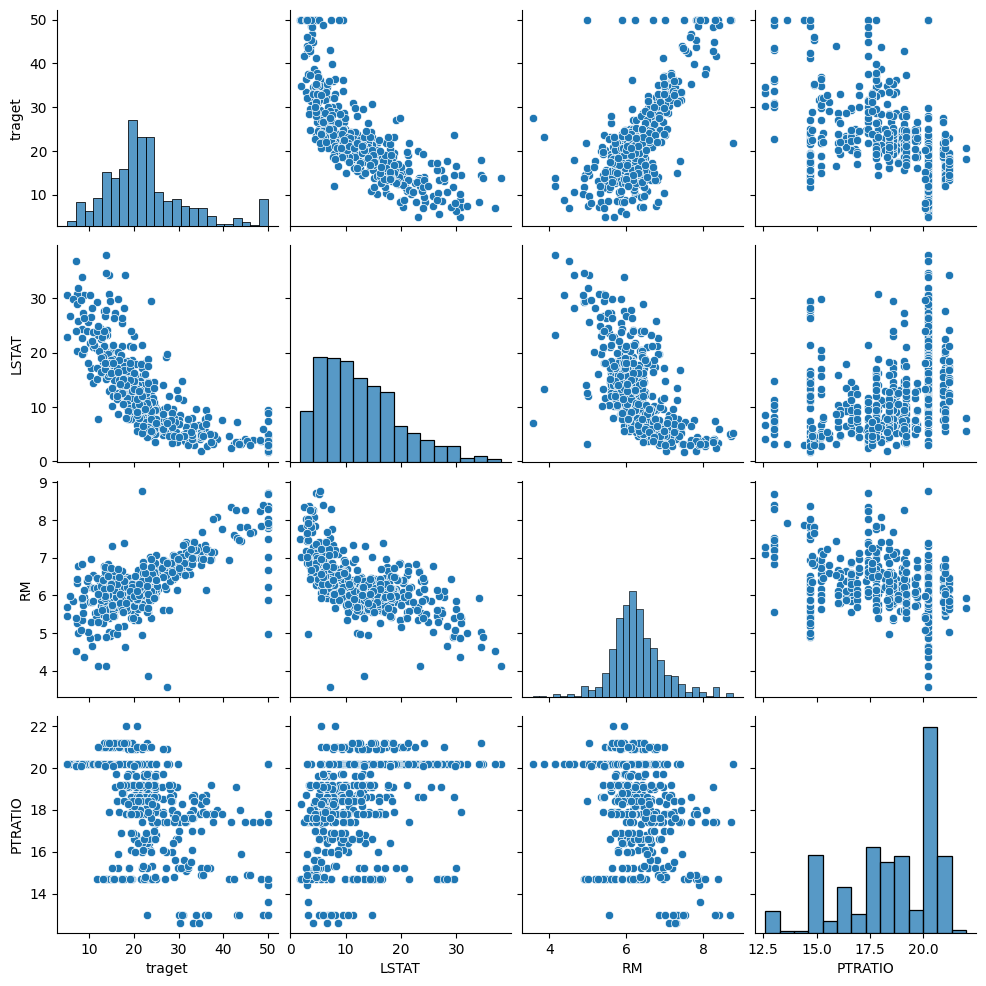

In [62]:
sns.pairplot(df[cols])
plt.show()

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [65]:
data = torch.FloatTensor( df[cols].to_numpy())

In [71]:
data.shape

torch.Size([506, 4])

In [76]:
X = data[:,1:]
Y = data[:,:1]

In [77]:
X.shape, Y.shape

(torch.Size([506, 3]), torch.Size([506, 1]))

In [78]:
n_epochs = 2000
lr = 1e-3

In [81]:
X.size(-1)

3

In [82]:
model = nn.Linear(X.size(-1), Y.size(-1))
model

Linear(in_features=3, out_features=1, bias=True)

In [83]:
op = optim.SGD(model.parameters(), lr = lr)

In [85]:
for i in range(n_epochs):
  y_hat = model(X)
  loss = F.mse_loss(y_hat, Y)
  op.zero_grad()
  loss.backward()
  op.step()
  if i % 100 == 0:
    print(f"epoch:{i} loss:{loss}")

epoch:0 loss:1028.8292236328125
epoch:100 loss:52.09591293334961
epoch:200 loss:44.46323013305664
epoch:300 loss:39.26869201660156
epoch:400 loss:35.73322296142578
epoch:500 loss:33.3267936706543
epoch:600 loss:31.68868637084961
epoch:700 loss:30.573467254638672
epoch:800 loss:29.814054489135742
epoch:900 loss:29.29678726196289
epoch:1000 loss:28.94430160522461
epoch:1100 loss:28.703954696655273
epoch:1200 loss:28.5399169921875
epoch:1300 loss:28.427820205688477
epoch:1400 loss:28.351057052612305
epoch:1500 loss:28.298343658447266
epoch:1600 loss:28.26200294494629
epoch:1700 loss:28.236797332763672
epoch:1800 loss:28.219181060791016
epoch:1900 loss:28.20672035217285


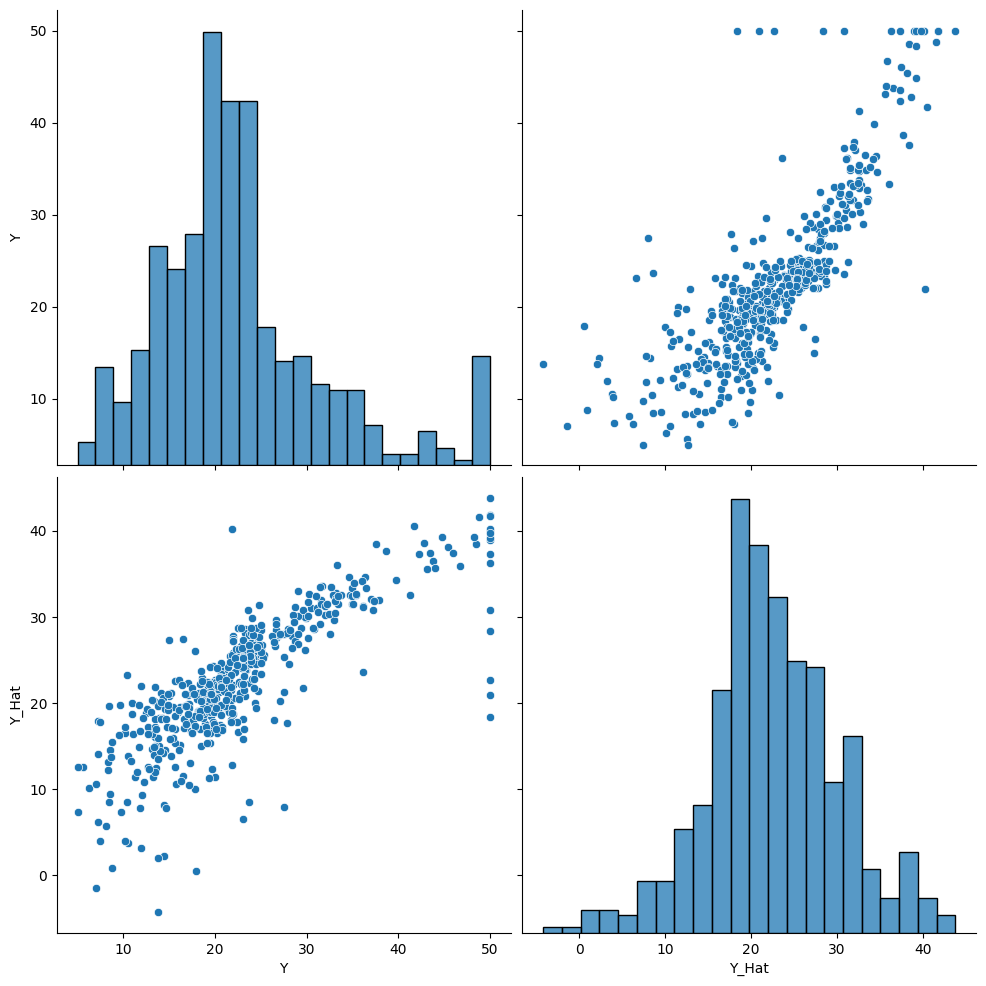

In [88]:
result = pd.DataFrame(torch.cat([Y,y_hat],dim=1).detach().numpy(), columns=['Y','Y_Hat'])
sns.pairplot(result,height=5)
plt.show()                     